# Coursera: Exploratory Data Analysis

<h2 align=center>Tumor Diagnosis (Part 1): Exploratory Data Analysis</h2>
<img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg">


### About the Dataset:

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Task 1: Loading Libraries and Data

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
import time

pd.set_option('display.max_columns', None)
sns.set()

In [5]:
br = pd.read_csv("data.csv")

<h2 align=center> Exploratory Data Analysis </h2>

---

### Task 2: Separate Target from Features
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [9]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
br.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Divide** the independent/predictor variables (x) and dependendent/outcome variable (y) from the dataset.

**Outcome Variable**

In [48]:
outcome = br['diagnosis'].reset_index()

**Predictor Variable**

In [25]:
predictors = br.drop(['id', 'diagnosis', 'Unnamed: 32'], axis="columns")

In [26]:
predictors.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<hr /> 

### Task 3: Plot Diagnosis Distributions
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

We need to check if there is a **class imbalance** problem through plots and histograms

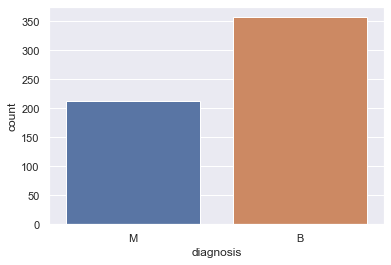

B    357
M    212
Name: diagnosis, dtype: int64

In [51]:
sns.countplot(x='diagnosis', data=outcome)
plt.show()

outcome['diagnosis'].value_counts()

The bar plot shows an imbalance between malignant and benign tumors. One has more distribution compared to the other.

1. Making the distribution similar through sampling methods
2. Oversampling the lower distribution, or undersampling the higher distribution

In [52]:
predictors.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


There is alot of outliers just by looking at the <code>min</code> and <code>max</code> features of the predictor variables

<h2 align=center> Data Visualization </h2>

---

### Task 4: Visualizing Standardized Data with Seaborn
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

After describing the predictor variables, the distribution of the data results to outliers. This could impact the model to be built later on.

The cell below, standardizes every cell of every columns using the **z formula in statistics**.

<img src='https://cdn.wallstreetmojo.com/wp-content/uploads/2019/05/Z-Test-Statistics-Formula.jpg' width='500px'/>

In [58]:
predictor_standardized = (predictors - predictors.mean()) / predictors.std()
predictor_standardized.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [59]:
predictors.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Formatting data for plotting

In [113]:
limit = predictor_standardized.iloc[:, :10] # select up to 10 columns
data = pd.concat([y, limit], axis='columns')
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764
1,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889
2,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658
3,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602
4,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956
...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209
565,M,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681
566,M,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800
567,M,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778


In [114]:
data = pd.melt(data, id_vars='diagnosis', var_name='feature', value_name='value')

In [115]:
data

,diagnosis,feature,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758
...,...,...,...
5685,M,fractal_dimension_mean,-0.930209
5686,M,fractal_dimension_mean,-1.057681
5687,M,fractal_dimension_mean,-0.894800
5688,M,fractal_dimension_mean,1.042778


Usage of **violin plot**

The violin plot is great for showing distribution of features grouped by classes.

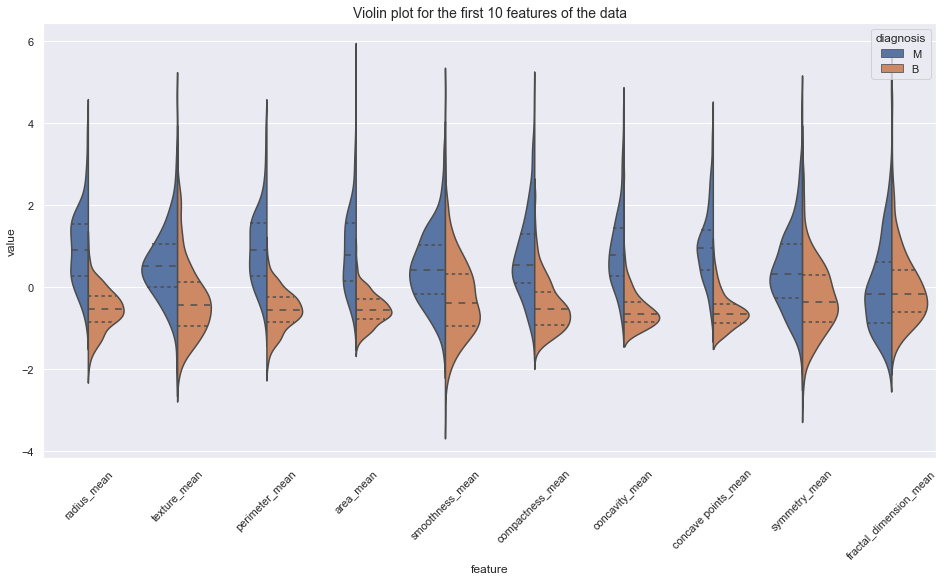

In [131]:
fig = plt.figure(figsize=(16, 8))

sns.violinplot(x='feature', y='value', hue='diagnosis', data=data, split=True, inner='quartile')
plt.title("Violin plot for the first 10 features of the data", fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Interpretation of Violin Plot**

<img src="https://miro.medium.com/max/1040/1*TTMOaNG1o4PgQd-e8LurMg.png" width="500px" />

Look at the **radius_mean** & **texture_mean**, the median value differs from the other class. This means that it could give information, such as predictive information, to the model.

On the othe hand, looking at the **fractal_dimension_mean**, the median value are similar, hence, it would not be able that much of an insight for our model.

### Task 5: Violin Plots and Box Plots
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

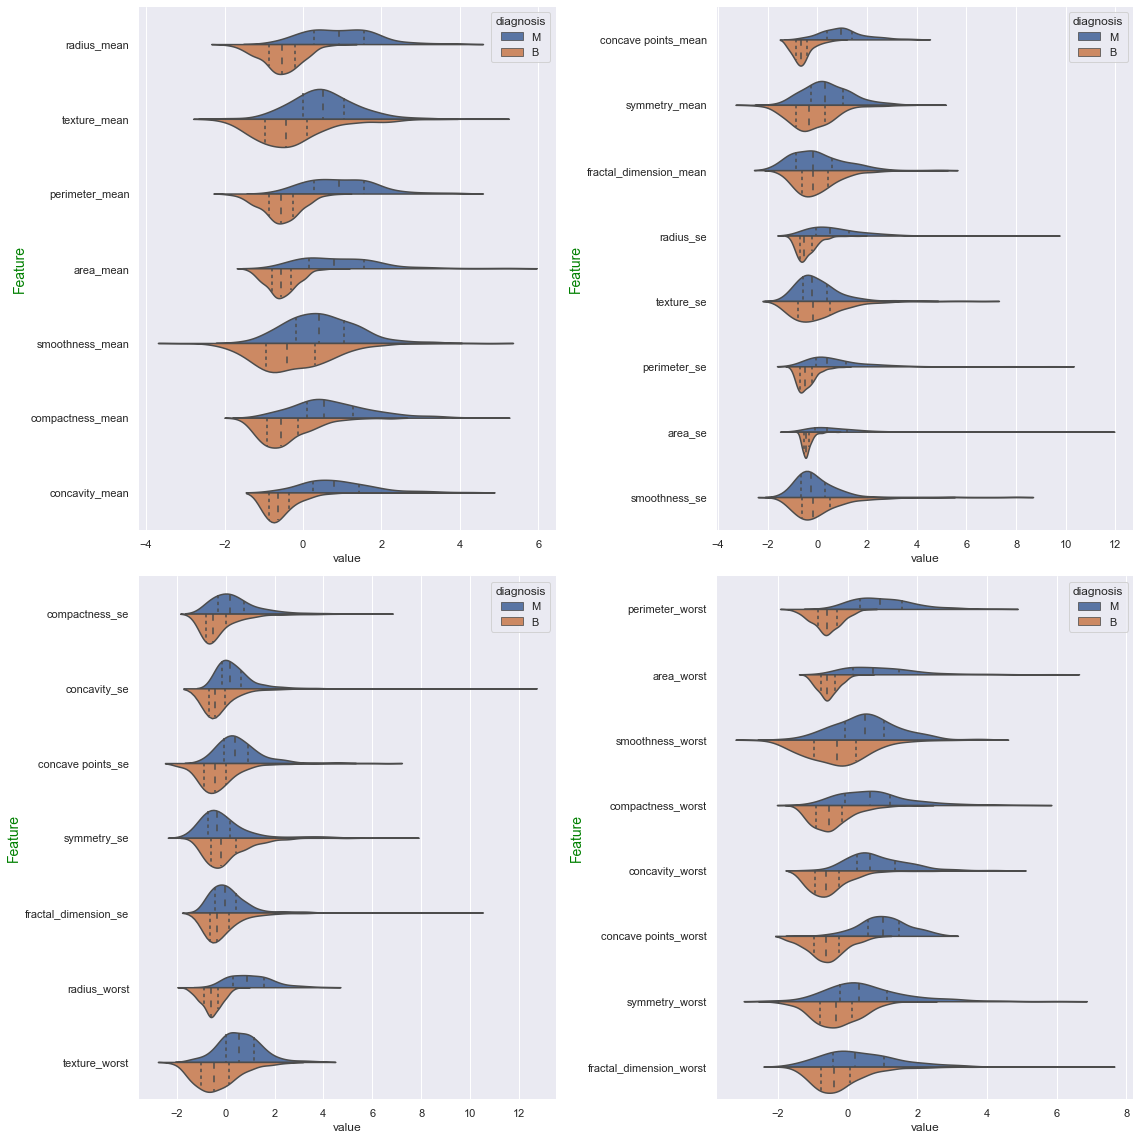

In [166]:
fig = plt.figure(figsize=(16, 16))

quadrants = [[0, 7], [7, 15], [15, 22], [22, 32]]
ctr = 1
for x in quadrants:
    limit = predictor_standardized.iloc[:, x[0]:x[1]]
    data = pd.concat([y, limit], axis='columns')
    data = pd.melt(data, id_vars='diagnosis', var_name='feature', value_name='value')
    
    # plot
    plt.subplot(2, 2, ctr)
    
    sns.violinplot(y='feature', x='value', orient='h', hue='diagnosis', data=data, split=True, inner='quartile')
    
    plt.ylabel("Feature", color='green', fontsize=14)
    
    [spine.set_visible(False) for spine in plt.gca().spines.values()]

    ctr += 1
    
fig.tight_layout()
plt.show()

Another interpretation is if **two or more features are similar**. Question is which column should be dropped to remove redundancy. Does one feature affect the other?

Having similar columns may negatively impact the model.

**Box plot**

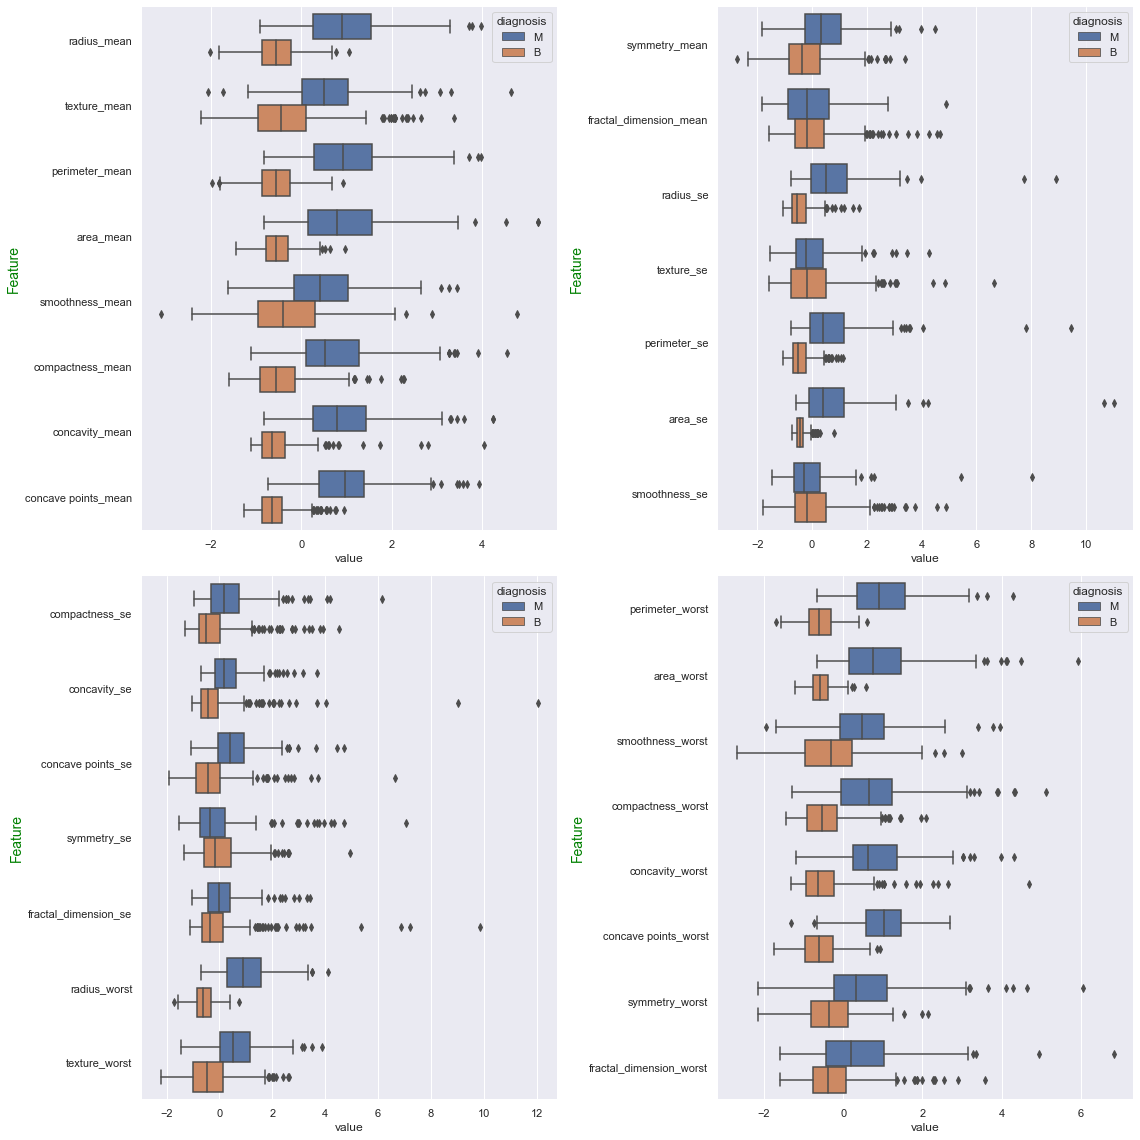

In [172]:
fig = plt.figure(figsize=(16, 16))

quadrants = [[0, 8], [8, 15], [15, 22], [22, 32]]
ctr = 1
for x in quadrants:
    limit = predictor_standardized.iloc[:, x[0]:x[1]]
    data = pd.concat([y, limit], axis='columns')
    data = pd.melt(data, id_vars='diagnosis', var_name='feature', value_name='value')
    
    # plot
    plt.subplot(2, 2, ctr)
    
    sns.boxplot(y='feature', x='value', orient='h', hue='diagnosis', data=data)
    
    plt.ylabel("Feature", color='green', fontsize=14)
    
    [spine.set_visible(False) for spine in plt.gca().spines.values()]

    ctr += 1
    
fig.tight_layout()
plt.show()

<hr />

### Task 6: Using Joint Plots for Feature Comparison
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

Another visualization technique to dive deeper into similar column/feature is througg **joint plots**.

It plots the columns on the axis independently to show how both makes and falls into a straight line.


<Figure size 1152x864 with 0 Axes>

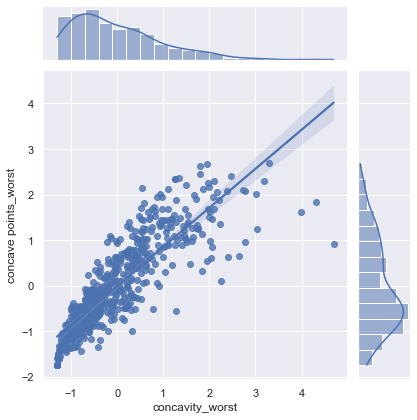

In [189]:
fig = plt.figure(figsize=(16,12))

sns.jointplot(x='concavity_worst', y='concave points_worst', data=predictor_standardized, kind='reg')
plt.xlabel("Concavity-Worst", color='green', fontsize=13)
plt.ylabel("Concave Points-Worst", color='green', fontsize=13)

plt.show()

The plot shows that the 2 features are correlated, although, the **pearson r** is not shown.

<br />

<hr /> 

### Task 7: Observing the Distribution of Values and their Variance with Swarm Plots
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

**Swarm Plots** has an advantage over **Violot Plot** because it is capable of visualizing each data point. These data points are stacked together if they similar range.

In [192]:
sns.set(style='whitegrid', palette='pastel')

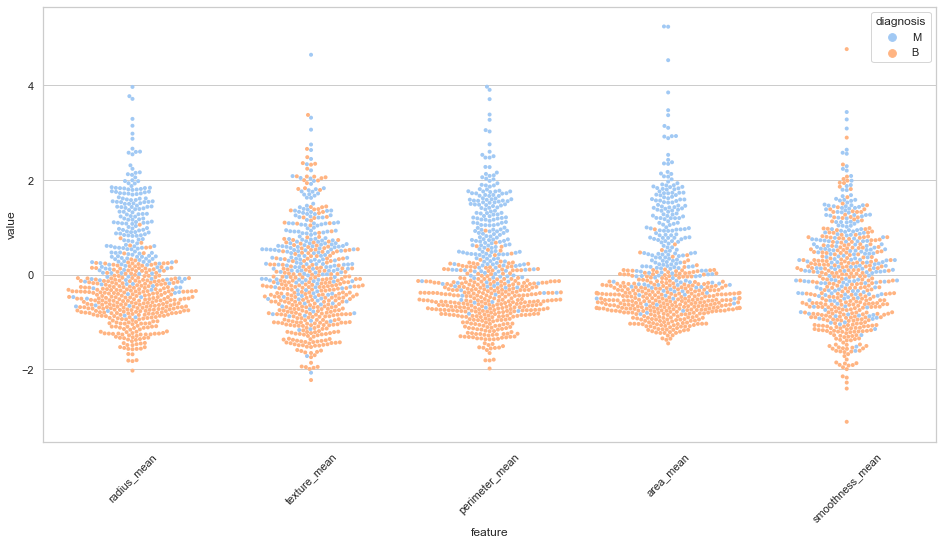

In [236]:
limit = predictor_standardized.iloc[:, :5]
data = pd.concat([y, limit], axis='columns')
data = pd.melt(data, id_vars='diagnosis', var_name='feature', value_name='value')

# plot
fig = plt.figure(figsize=(16, 8))
sns.swarmplot(x='feature', y='value', hue='diagnosis', data=data, size=4)
plt.xticks(rotation=45)

plt.show()

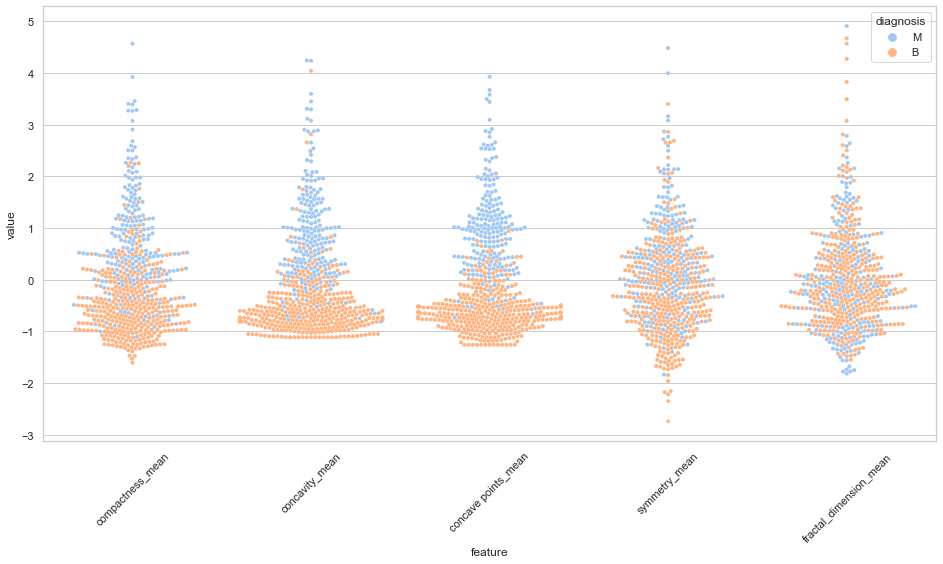

In [237]:
limit = predictor_standardized.iloc[:, 5:10]
data = pd.concat([y, limit], axis='columns')
data = pd.melt(data, id_vars='diagnosis', var_name='feature', value_name='value')

# plot
fig = plt.figure(figsize=(16, 8))
sns.swarmplot(x='feature', y='value', hue='diagnosis', data=data, size=4)
plt.xticks(rotation=45)

plt.show()

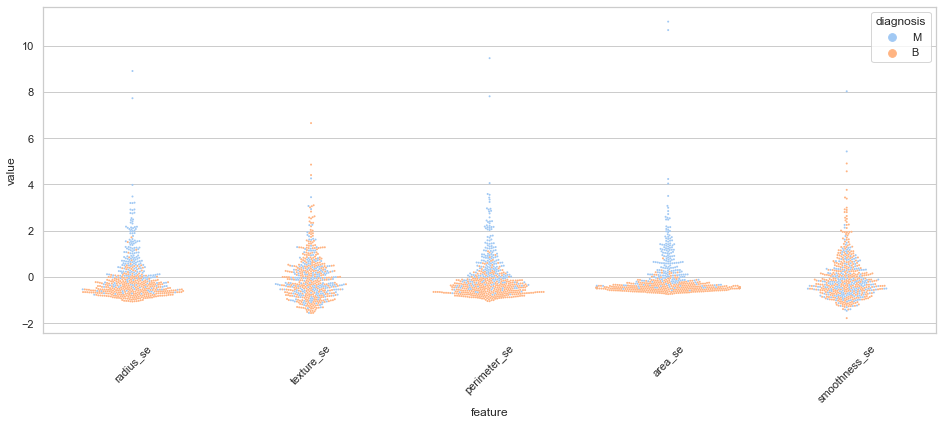

In [247]:
limit = predictor_standardized.iloc[:, 10:15]
data = pd.concat([y, limit], axis='columns')
data = pd.melt(data, id_vars='diagnosis', var_name='feature', value_name='value')

# plot
fig = plt.figure(figsize=(16, 6))
sns.swarmplot(x='feature', y='value', hue='diagnosis', data=data, size=2)
plt.xticks(rotation=45)

plt.show()

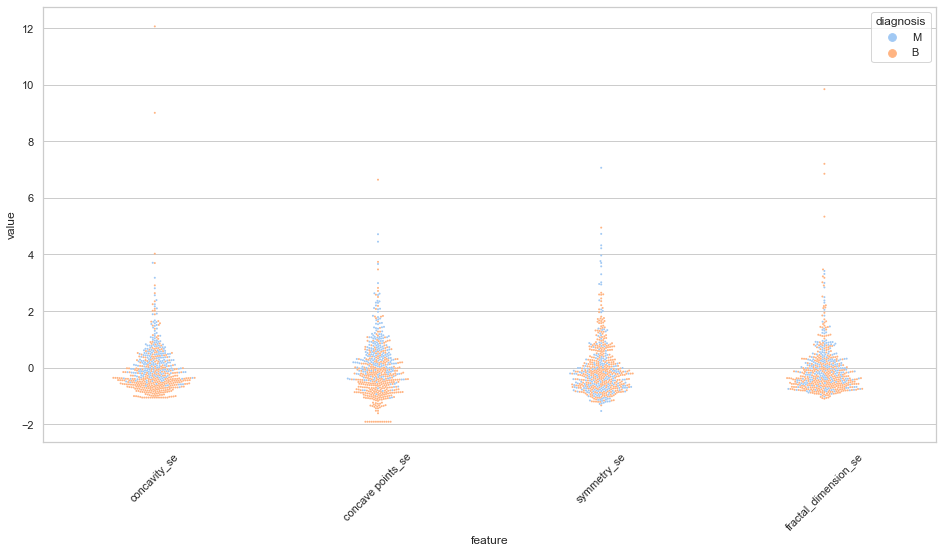

In [243]:
limit = predictor_standardized.iloc[:, 16:20]
data = pd.concat([y, limit], axis='columns')
data = pd.melt(data, id_vars='diagnosis', var_name='feature', value_name='value')

# plot
fig = plt.figure(figsize=(16, 8))
sns.swarmplot(x='feature', y='value', hue='diagnosis', data=data, size=2)
plt.xticks(rotation=45)

plt.show()

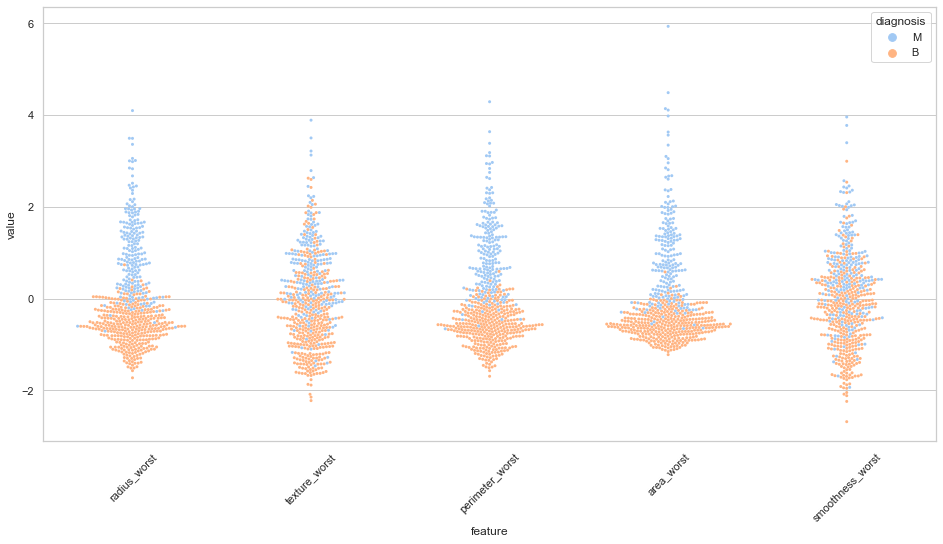

In [244]:
limit = predictor_standardized.iloc[:, 20:25]
data = pd.concat([y, limit], axis='columns')
data = pd.melt(data, id_vars='diagnosis', var_name='feature', value_name='value')

# plot
fig = plt.figure(figsize=(16, 8))
sns.swarmplot(x='feature', y='value', hue='diagnosis', data=data, size=3)
plt.xticks(rotation=45)

plt.show()

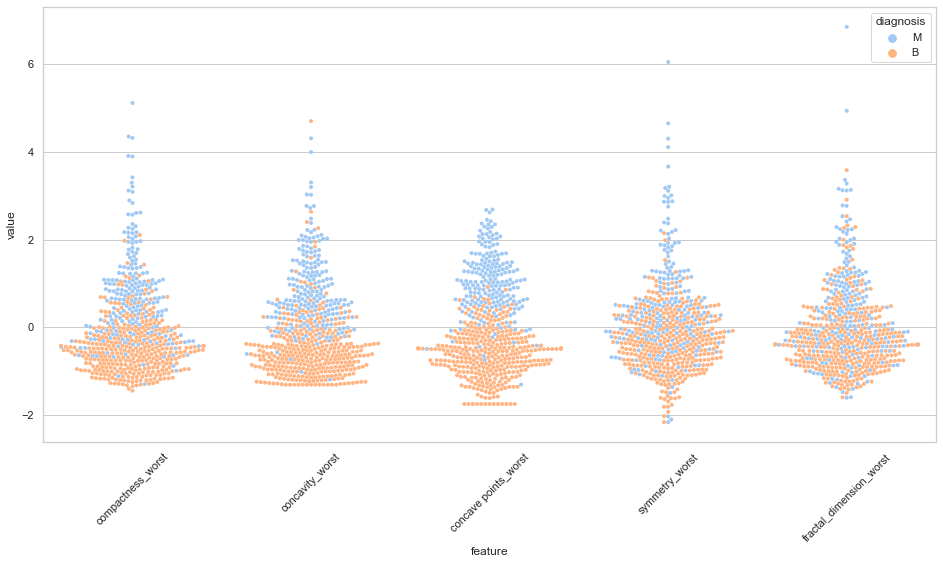

In [245]:
limit = predictor_standardized.iloc[:, 25:30]
data = pd.concat([y, limit], axis='columns')
data = pd.melt(data, id_vars='diagnosis', var_name='feature', value_name='value')

# plot
fig = plt.figure(figsize=(16, 8))
sns.swarmplot(x='feature', y='value', hue='diagnosis', data=data, size=4)
plt.xticks(rotation=45)

plt.show()

**Intepretation**

Looking at some of the features, for example, **radius_worst** there is definitive classification and divide between **Benign** from **Malignant**.

On the other hand, if you were to look at **symettry_se**, individual data points are **well mixed** and would be difficult to be used to classify the data as either **Benign or Malignant**.

<hr />

### Task 8: Observing all Pair-wise Correlations
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

Looking at the distribution and individual data points of the data were achieved through 
1. Violin and box plot; and,
2. Swarm plot

However, seaborn also offers a **group-wise** visualization of every features instead of batch-by-batch

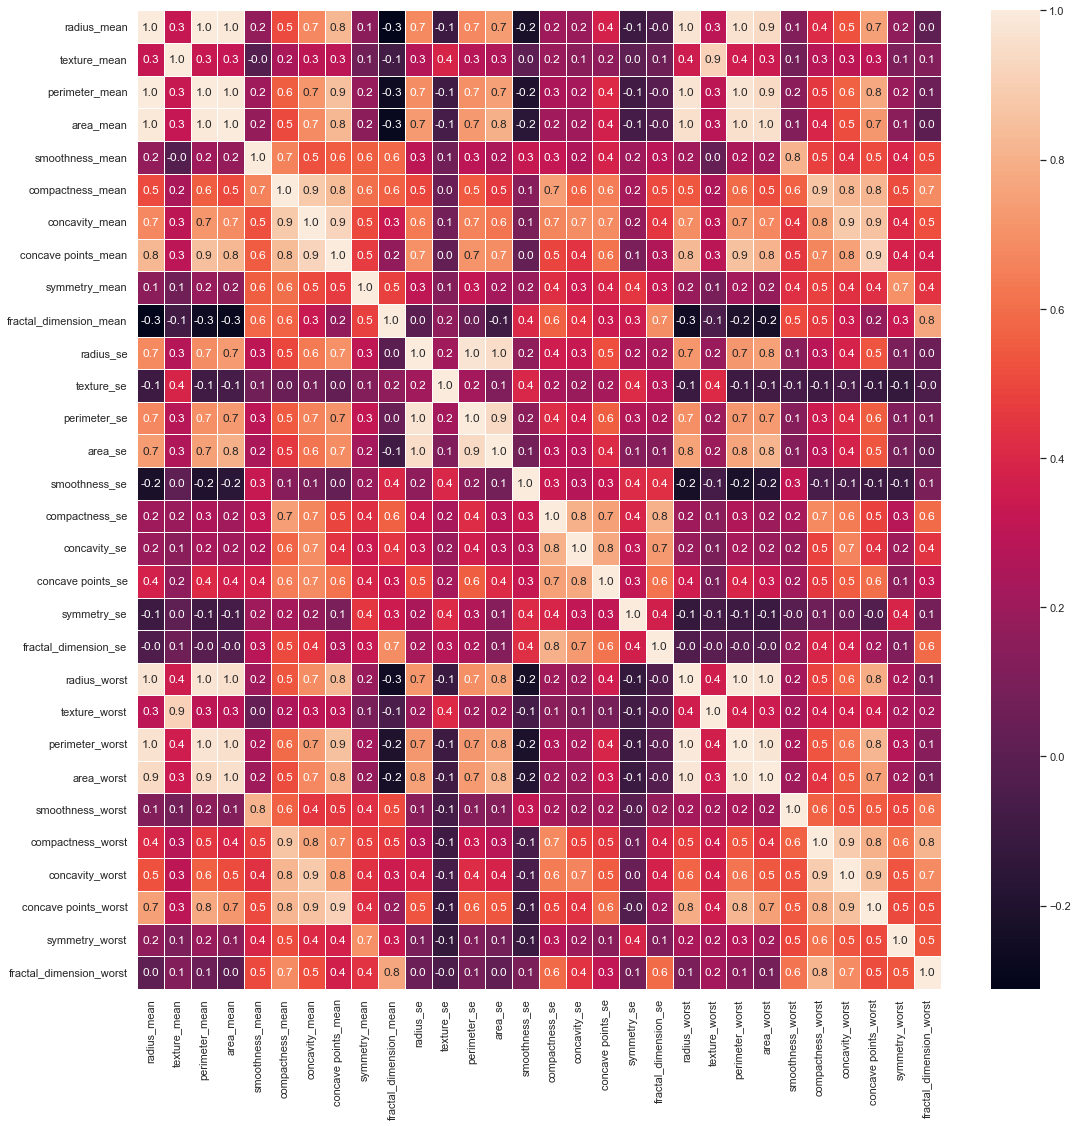

In [248]:
fig, ax = plt.subplots(figsize=(18, 18))

sns.heatmap(predictors.corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax)
plt.show()

**Light Colored Cells** shows a high correlation between features. And, **Darker Colored Cells** shows mediocre to none correlation.

This plot should alert the analyst to use the correlated features instead of non-correlated features.